In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the AlexNet model
def create_alexnet(input_shape=(224, 224, 3), num_classes=8):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Create the AlexNet model
model = create_alexnet(input_shape=(224, 224, 3), num_classes=6)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adjust learning rate
    loss='categorical_crossentropy',  # Multi-class classification
    metrics=['accuracy']
)
model.summary()

# Define ImageDataGenerator without traditional augmentation
train_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for training
val_datagen = ImageDataGenerator(rescale=1./255)    # Only rescaling for validation
test_datagen = ImageDataGenerator(rescale=1./255)   # Only rescaling for test

# Load Training Data
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/diffmango224x224/AMBADIFUSEDATASET224X224/train',   # Path to train folder
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical'  # Multi-class classification (8 classes)
)

# Load Validation Data
val_generator = val_datagen.flow_from_directory(
    '/kaggle/input/diffmango224x224/AMBADIFUSEDATASET224X224/val',   # Path to validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load Test Data (For final evaluation)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/diffmango224x224/AMBADIFUSEDATASET224X224/test',   # Path to test folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False   # No shuffling for test set
)





2025-07-14 15:57:39.997290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752508660.356272      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752508660.455077      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752508679.743680      36 gpu_device.cc:2022] Created device /job:localhost/repl

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    26,218,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │        24,582 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,771,590 (178.42 MB)

 Trainable params: 46,771,590 (178.42 MB)

 Non-trainable params: 0 (0.00 B)

Found 46646 images belonging to 6 classes.
Found 9993 images belonging to 6 classes.
Found 10001 images belonging to 6 classes.


In [2]:
# Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30


I0000 00:00:1752508719.678969      99 service.cc:148] XLA service 0x7932c40028b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752508719.680302      99 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752508719.680321      99 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752508720.217008      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


   2/1458 ━━━━━━━━━━━━━━━━━━━━ 1:34 65ms/step - accuracy: 0.1641 - loss: 1.7962  

I0000 00:00:1752508727.212790      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1458/1458 ━━━━━━━━━━━━━━━━━━━━ 561s 377ms/step - accuracy: 0.6095 - loss: 0.9610 - val_accuracy: 0.9659 - val_loss: 0.1215
Epoch 2/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 250s 172ms/step - accuracy: 0.9702 - loss: 0.1003 - val_accuracy: 0.9776 - val_loss: 0.0844
Epoch 3/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 234s 160ms/step - accuracy: 0.9814 - loss: 0.0624 - val_accuracy: 0.9890 - val_loss: 0.0413
Epoch 4/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 256s 176ms/step - accuracy: 0.9867 - loss: 0.0465 - val_accuracy: 0.9849 - val_loss: 0.0478
Epoch 5/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 223s 153ms/step - accuracy: 0.9898 - loss: 0.0356 - val_accuracy: 0.9916 - val_loss: 0.0311
Epoch 6/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 221s 151ms/step - accuracy: 0.9914 - loss: 0.0297 - val_accuracy: 0.9873 - val_loss: 0.0411
Epoch 7/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 206s 141ms/step - accuracy: 0.9933 - loss: 0.0246 - val_accuracy: 0.9824 - val_loss: 0.0624
Epoch 8/30
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 217s 149ms/step - accuracy: 0.9

In [3]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy RDIFF_AlexNet: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 117s 375ms/step - accuracy: 0.9925 - loss: 0.0673
Test accuracy RDIFF_AlexNet: 0.9948


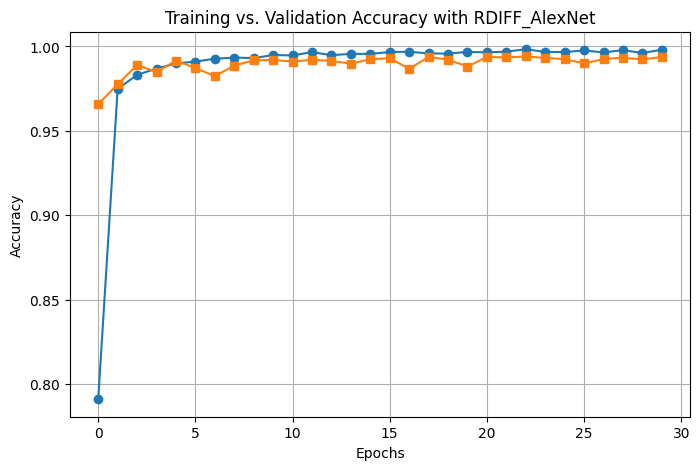

In [4]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy with RDIFF_AlexNet')
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step

Classification Report RDIFF_AlexNet with LDM Aug :

                    precision    recall  f1-score   support

       ANTHRACNOSE       1.00      0.99      0.99      1634
           DIEBACK       1.00      1.00      1.00      1664
   GALLMIDGEDAMAGE       0.99      0.99      0.99      1596
           HEALTHY       1.00      1.00      1.00      1793
INSECTDAMAGEWEBBER       0.99      0.99      0.99      1671
        LEAFBLIGHT       0.99      0.99      0.99      1643

          accuracy                           0.99     10001
         macro avg       0.99      0.99      0.99     10001
      weighted avg       0.99      0.99      0.99     10001



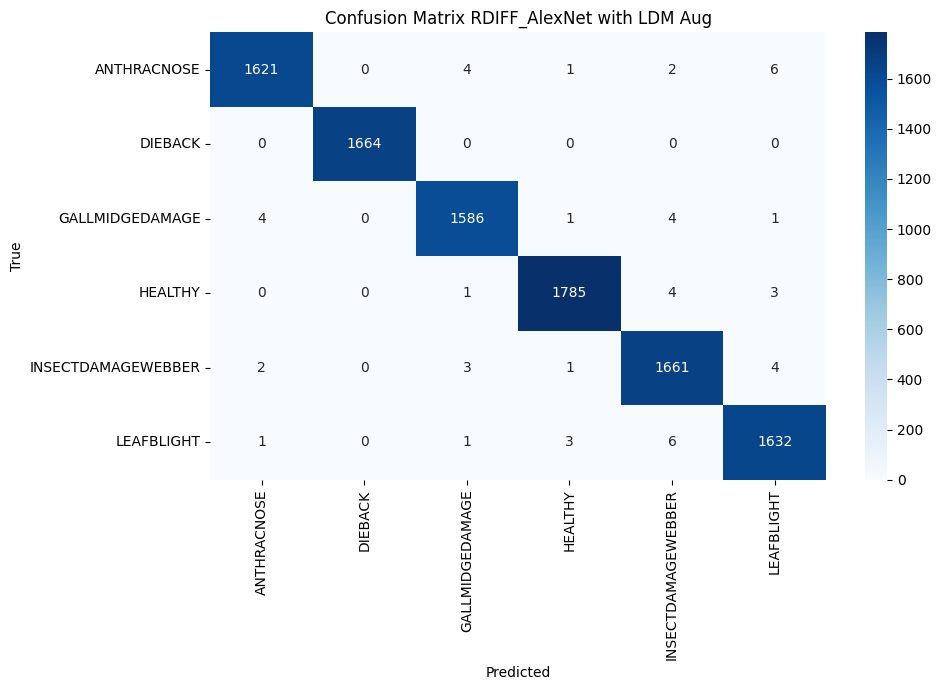

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import random
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# === Predictions & Reports ===
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report RDIFF_AlexNet with LDM Aug :\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix RDIFF_AlexNet with LDM Aug')
plt.tight_layout()
plt.show()

In [9]:
import tensorflow as tf
import numpy as np

def get_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # Build sub-model that maps image to activation and predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Get gradients of the target class wrt the conv outputs
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight conv output channels with grads
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [10]:
import matplotlib.pyplot as plt
import cv2
import random

# Settings
target_class_index = 2  # Change this to desired class index (0 to num_classes - 1)
target_class_name = class_names[target_class_index]
last_conv_layer_name = "block14_sepconv2_act"  # For Xception

# Sample 20 images from test set of target class
indices = np.where(y_true == target_class_index)[0]
sample_indices = random.sample(list(indices), 20)

plt.figure(figsize=(20, 10))

for i, idx in enumerate(sample_indices):
    img, _ = test_generator[idx]
    img_array = np.expand_dims(img[0], axis=0)  # Add batch dim

    # Generate heatmap
    heatmap = get_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # De-normalize image
    img_uint8 = (img[0] * 255).astype("uint8")

    # Resize and overlay heatmap
    heatmap_resized = cv2.resize(heatmap, (img_uint8.shape[1], img_uint8.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_uint8, 0.6, heatmap_colored, 0.4, 0)

    # Plot
    plt.subplot(4, 5, i + 1)
    plt.imshow(superimposed_img)
    plt.title(f"{target_class_name}")
    plt.axis('off')

plt.suptitle(f"Grad-CAM: Top 20 Samples - Class: {target_class_name}", fontsize=20)
plt.tight_layout()
plt.show()


NameError: name 'class_names' is not defined

In [11]:
# 📊 Visualize 10 random test samples per class using Grad-CAM

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import random
from tensorflow.keras.preprocessing import image

# ✅ Grad-CAM function
def get_gradcam_heatmap(model, image, class_index=None, last_conv_layer_name=None):
    if last_conv_layer_name is None:
        for layer in reversed(model.layers):
            if isinstance(layer, tf.keras.layers.Conv2D):
                last_conv_layer_name = layer.name
                break
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(image, axis=0))
        if class_index is None:
            class_index = np.argmax(predictions[0])
        class_output = predictions[:, class_index]
    grads = tape.gradient(class_output, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# ✅ Heatmap overlay
def overlay_heatmap(heatmap, image, alpha=0.5, colormap=cv2.COLORMAP_JET):
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, colormap)
    overlayed_img = cv2.addWeighted(image, 1 - alpha, heatmap_color, alpha, 0)
    return overlayed_img

# ✅ Dataset path
test_path = '/kaggle/input/diffmango224x224/AMBADIFUSEDATASET224X224/test'
class_labels = list(train_generator.class_indices.keys())

# ✅ Loop through each class and pick 10 random images
for cls in class_labels:
    class_dir = os.path.join(test_path, cls)
    image_files = os.listdir(class_dir)
    random_images = random.sample(image_files, min(10, len(image_files)))

    print(f"\n📌 Visualizing 10 Grad-CAM samples for class: {cls}")
    plt.figure(figsize=(20, 10))

    for i, img_name in enumerate(random_images):
        img_path = os.path.join(class_dir, img_name)

        # Load and preprocess
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img) / 255.0
        heatmap = get_gradcam_heatmap(model, img_array)
        original = (img_array * 255).astype(np.uint8)
        overlay = overlay_heatmap(heatmap, original)

        # Plot
        plt.subplot(2, 5, i + 1)
        plt.imshow(overlay)
        plt.title(f"{cls}\n{img_name}", fontsize=9)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


📌 Visualizing 10 Grad-CAM samples for class: ANTHRACNOSE


AttributeError: The layer sequential has never been called and thus has no defined output.

<Figure size 2000x1000 with 0 Axes>